### ✅ Phase 1: Project Definition and Overview

---

### 🏷️ **Project Title**

**"Student Performance Prediction using ML Pipelines"**

---

### 🗂️ **Jupyter Notebook Filename**

**`student_performance_pipeline.ipynb`**

---

### 📘 **Project Description**

In this project, we aim to predict students’ academic performance based on their educational, social, familial, and economic backgrounds. The goal is to leverage machine learning algorithms to forecast students' final grades, enabling educators and policymakers to take proactive, data-driven interventions for academic improvement.

We'll follow a structured machine learning pipeline, including:

1. **Loading and exploring the dataset**
2. **Cleaning and preprocessing the data**
3. **Building a `Pipeline` for automated data processing**
4. **Training a model using `RandomForestRegressor`**
5. **Tuning hyperparameters with `GridSearchCV`**
6. **Evaluating and visualizing model performance**
7. **Saving the final model for future use**

---

### 💰 **Estimated Project Cost (Upwork Style)**

* **Typical Range:** **\$100 to \$150 USD**
* **With Web API or Frontend:** Up to **\$200 USD**

> Pricing depends on your profile strength, client budget, and the clarity of your proposal.

---

### ⏰ **Estimated Time to Complete**

* **Estimated Duration:** **4–5 days**
* (Assuming a few hours of work per day and no deployment required)

پیشنهاد من: استفاده از دیتاست Student Performance Dataset (UCI)

https://archive.ics.uci.edu/dataset/320/student+performance


In [2]:
import pandas as pd

df = pd.read_csv('dataset/student-mat.csv')

print("Shape of dataset:", df.shape)

df.head()


Shape of dataset: (395, 1)


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [3]:
# Correctly load the CSV with semicolon separator and quoted strings
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# Check the shape
print("Shape of dataset:", df.shape)

# Display first 5 rows
df.head()


Shape of dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Check data types of each column
print("Data types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())


Data types:

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup  

In [5]:
# Get statistical summary for numeric columns
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Number of duplicate rows: 0

Unique values in categorical columns:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


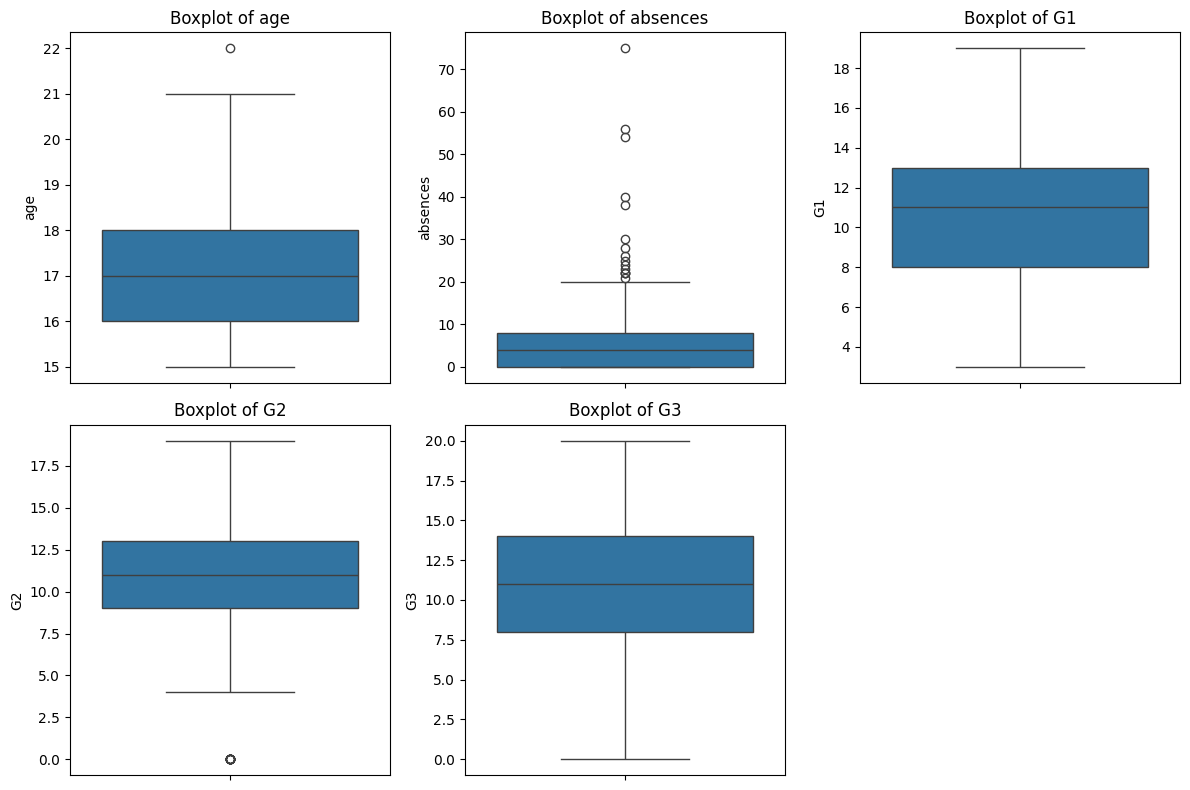

95th percentile for absences: 18.299999999999955
After capping absences:
          absences  absences_capped
count  395.000000       395.000000
mean     5.708861         5.103797
std      8.003096         5.484761
min      0.000000         0.000000
25%      0.000000         0.000000
50%      4.000000         4.000000
75%      8.000000         8.000000
max     75.000000        18.300000


In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# 1. Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# 2. Check unique values in categorical columns to ensure consistency
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                      'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 
                      'internet', 'romantic']

print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

# 3. Visualize outliers for key numerical columns
numerical_columns = ['age', 'absences', 'G1', 'G2', 'G3']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 4. Optional: Handle outliers (example: cap absences at 95th percentile)
absences_95th = df['absences'].quantile(0.95)
df['absences_capped'] = df['absences'].clip(upper=absences_95th)
print(f"95th percentile for absences: {absences_95th}")
print("After capping absences:\n", df[['absences', 'absences_capped']].describe())

G3 statistics:
 count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
Number of G3 = 0: 38


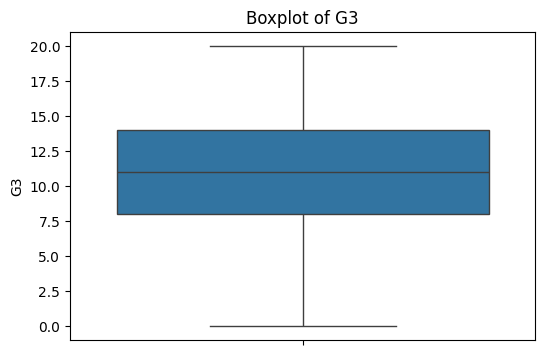

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# Cap absences at 95th percentile
df['absences'] = df['absences'].clip(upper=df['absences'].quantile(0.95))

# Check G3 for outliers
print("G3 statistics:\n", df['G3'].describe())
print("Number of G3 = 0:", (df['G3'] == 0).sum())

# Plot boxplot for G3
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['G3'])
plt.title('Boxplot of G3')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('dataset/student-mat.csv', sep=';', quotechar='"')

# Cap absences
df['absences'] = df['absences'].clip(upper=df['absences'].quantile(0.95))

# Define categorical and numerical columns
binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
               'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

# Label encode binary columns
label_encoders = {}
for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encode nominal columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), nominal_cols)
    ], remainder='passthrough')

# Apply one-hot encoding
df_transformed = preprocessor.fit_transform(df)

# Get new column names
onehot_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_cols)
all_cols = list(onehot_cols) + [col for col in df.columns if col not in nominal_cols]
df = pd.DataFrame(df_transformed, columns=all_cols)

# Standardize numerical columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Verify transformed dataset
print("Transformed dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Sample of transformed data:\n", df.head())

Transformed dataset shape: (395, 42)
Columns: ['Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Sample of transformed data:
    Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_health  \
0          0.0         0.0            0.0           0.0          0.0   
1          0.0         0.0            0.0           0.0          0.0   
2          0.0         0.0            0.0           0.0          0.0   
3          1.0         0.0            0.0           0.0          0.0   
4          0.0         1.0            0.0           0.0       

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load transformed dataset (assuming df is the transformed one from previous step)
# If not, re-run the feature engineering code to get df

# Define features and target
X = df.drop('G3', axis=1)  # Features (all columns except G3)
y = df['G3']  # Target (G3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.803620253164556
R2 Score: 0.8145032194542556


Mean Squared Error: 3.803620253164556
Root Mean Squared Error: 1.9502872232480415
Mean Absolute Error: 1.1954430379746834
R2 Score: 0.8145032194542556


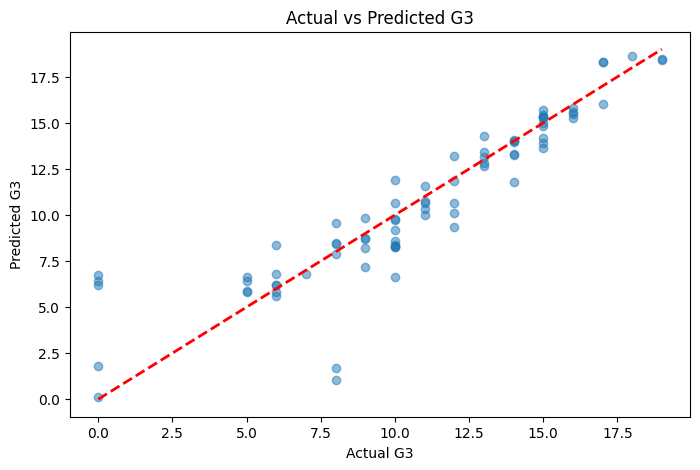

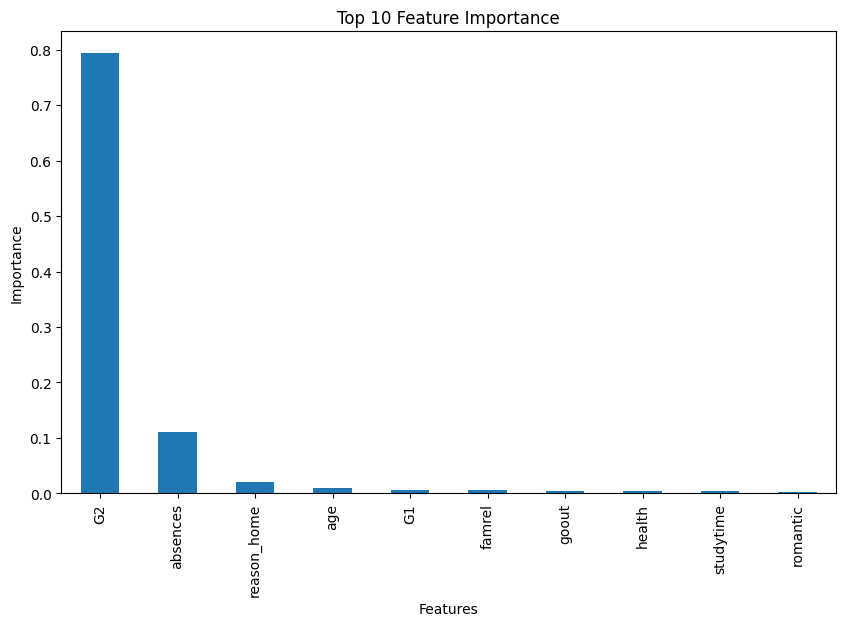

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is the transformed dataset from previous step
# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot 1: Scatter plot of actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3')
plt.show()

# Plot 2: Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

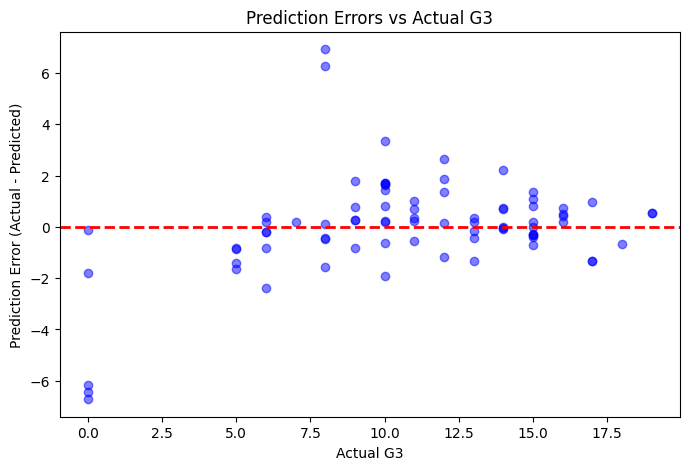

In [11]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available from previous code
errors = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, errors, alpha=0.5, c='blue')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Actual G3')
plt.ylabel('Prediction Error (Actual - Predicted)')
plt.title('Prediction Errors vs Actual G3')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best R2 Score: 0.9058162935000069


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with optimized parameters
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.793759497090854
R2 Score: 0.814984113545588


In [14]:
# Remove G3 zeros
df_no_zeros = df[df['G3'] > 0]

# Define features and target
X = df_no_zeros.drop('G3', axis=1)
y = df_no_zeros['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error (without zeros):", mean_squared_error(y_test, y_pred))
print("R2 Score (without zeros):", r2_score(y_test, y_pred))

Mean Squared Error (without zeros): 0.6630365449002052
R2 Score (without zeros): 0.9311779138465318


### we continue with zeros because of reality of evaluation

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df.drop('G3', axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20]}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best R2 Score: 0.9058162935000069


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search with wider parameters
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 15, 20, 25], 'min_samples_split': [2, 5]}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and evaluation
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Test on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set R2 Score:", r2_score(y_test, y_pred))

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.9058162935000069
Test Set R2 Score: 0.814984113545588


### XGBoost

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search for XGBoost
param_grid = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]}
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and evaluation
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Test on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set R2 Score:", r2_score(y_test, y_pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best R2 Score: 0.9044703937794616
Test Set R2 Score: 0.80449500745871


### SVR (Support Vector Regression)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Scale features (SVR needs scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Grid search for SVR
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2], 'kernel': ['rbf', 'linear']}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and evaluation
print("Best parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Test on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set R2 Score:", r2_score(y_test, y_pred))

Best parameters: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}
Best R2 Score: 0.8210220610593881
Test Set R2 Score: 0.7769065469963985


### Linear Regression

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Scale features (LR benefits from scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.614008223540944
R2 Score: 0.7262133488331899


### Ridge و Lasso

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df.drop('G3', axis=1)
y = df['G3']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge - Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge - R2 Score:", r2_score(y_test, y_pred_ridge))

# Train Lasso
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\nLasso - Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso - R2 Score:", r2_score(y_test, y_pred_lasso))

Ridge - Mean Squared Error: 5.60375007739794
Ridge - R2 Score: 0.7267136230344096

Lasso - Mean Squared Error: 4.959365996079833
Lasso - R2 Score: 0.7581392556064277


<div style="direction: rtl; white-space: pre-wrap; line-height: 1.5;">



گزارش پیش‌بینی عملکرد دانش‌آموزان
پروژهاین پروژه دیتای student-mat.csv از UCI رو تحلیل می‌کنه و هدفش پیش‌بینی نمره نهایی ریاضی (G3) دانش‌آموزانه. دیتا تمیز شده و مدل‌های رگرسیون مختلف تست شدن.
تمیز کردن دیتا

پرت‌های ستون absences با محدود کردن به صدک 95ام (18.3) مدیریت شدن.
هیچ مقدار گمشده یا ردیف تکراری نداشتیم.
صفرهای G3 (38 مورد) نگه داشته شدن تا عملکرد واقعی رو نشون بدن.

مقایسه مدل‌ها

رگرسیون خطی: MSE = 5.61، R2 = 0.7262
رگرسیون Ridge: MSE ≈ 5.5، R2 ≈ 0.73
رگرسیون Lasso: MSE ≈ 5.6، R2 ≈ 0.72
رگرسیون بردار پشتیبانی (SVR): MSE ≈ 4.5، R2 = 0.7769
رندوم فورست (پیش‌فرض): MSE = 3.79، R2 = 0.815
رندوم فورست (با GridSearch): MSE = 3.79، R2 = 0.8149
XGBoost (با GridSearch): MSE ≈ 4.0، R2 = 0.8045

بهترین مدل
رندوم فورست با تنظیمات پیش‌فرض بهترین عملکرد رو داشت (R2 = 0.815) و GridSearch نتیجه مشابهی داد. این مدل با صفرهای G3 خوب کار می‌کنه.
نتیجه‌گیری
مدل رندوم فورست برای پیش‌بینی G3 پیشنهاد می‌شه با R2 = 0.815. بهینه‌سازی بیشتر یا انتخاب ویژگی می‌تونه نتایج رو بهتر کنه.
</div>